In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./RST_day.csv"
df = pd.read_csv(path, low_memory=False)

In [11]:


# Create a DataFrame to hold the results
results_df = pd.DataFrame(columns=['Column', 'Type', 'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Unique Values', 'Top 3 Values', 'Missingness (%)'])

for idx, column in enumerate(df.columns):
    column_info = {}
    dtype = df[column].dtype
    missingness = df[column].isna().mean() * 100
    
    column_info['Column'] = column
    column_info['Missingness (%)'] = missingness
    
    if dtype == 'datetime64[ns]':
        column_info['Type'] = 'Temporal'
    elif np.issubdtype(dtype, np.number) and missingness < 100:
        column_info['Type'] = 'Numeric/Real/Continuous'
        column_info['Min'] = df[column].min()
        column_info['Max'] = df[column].max()
        column_info['Mean'] = df[column].mean()
        column_info['Median'] = df[column].median()
        column_info['Std Dev'] = df[column].std()
    else:
        column_info['Type'] = 'Symbolic/Discrete'
        column_info['Unique Values'] = df[column].nunique()
        top_values = df[column].value_counts().head(3)
        column_info['Top 3 Values'] = str(top_values.to_dict())
    
    results_df.loc[idx] = column_info  # Use loc to append row to DataFrame

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors='coerce')
results_df.loc[results_df['Column'] == 'CrimeDate', 'Type'] = 'Temporal'

# Print the results in tabular format
print(results_df.to_string(index=False))


         Column                    Type        Min        Max       Mean     Median  Std Dev  Unique Values                                                                  Top 3 Values  Missingness (%)
      CrimeDate                Temporal        NaN        NaN        NaN        NaN      NaN         2300.0                     {'04/27/2015': 421, '06/05/2016': 255, '12/20/2018': 212}         0.000000
      CrimeTime       Symbolic/Discrete        NaN        NaN        NaN        NaN      NaN         1475.0                        {'18:00:00': 6772, '17:00:00': 6463, '12:00:00': 6037}         0.008881
      CrimeCode       Symbolic/Discrete        NaN        NaN        NaN        NaN      NaN           81.0                                       {'4E': 48061, '6D': 38977, '5A': 25351}         0.000000
       Location       Symbolic/Discrete        NaN        NaN        NaN        NaN      NaN        27064.0    {'1500 RUSSELL ST': 847, '3500 BOSTON ST': 708, '2400 FREDERICK AVE': 558}   

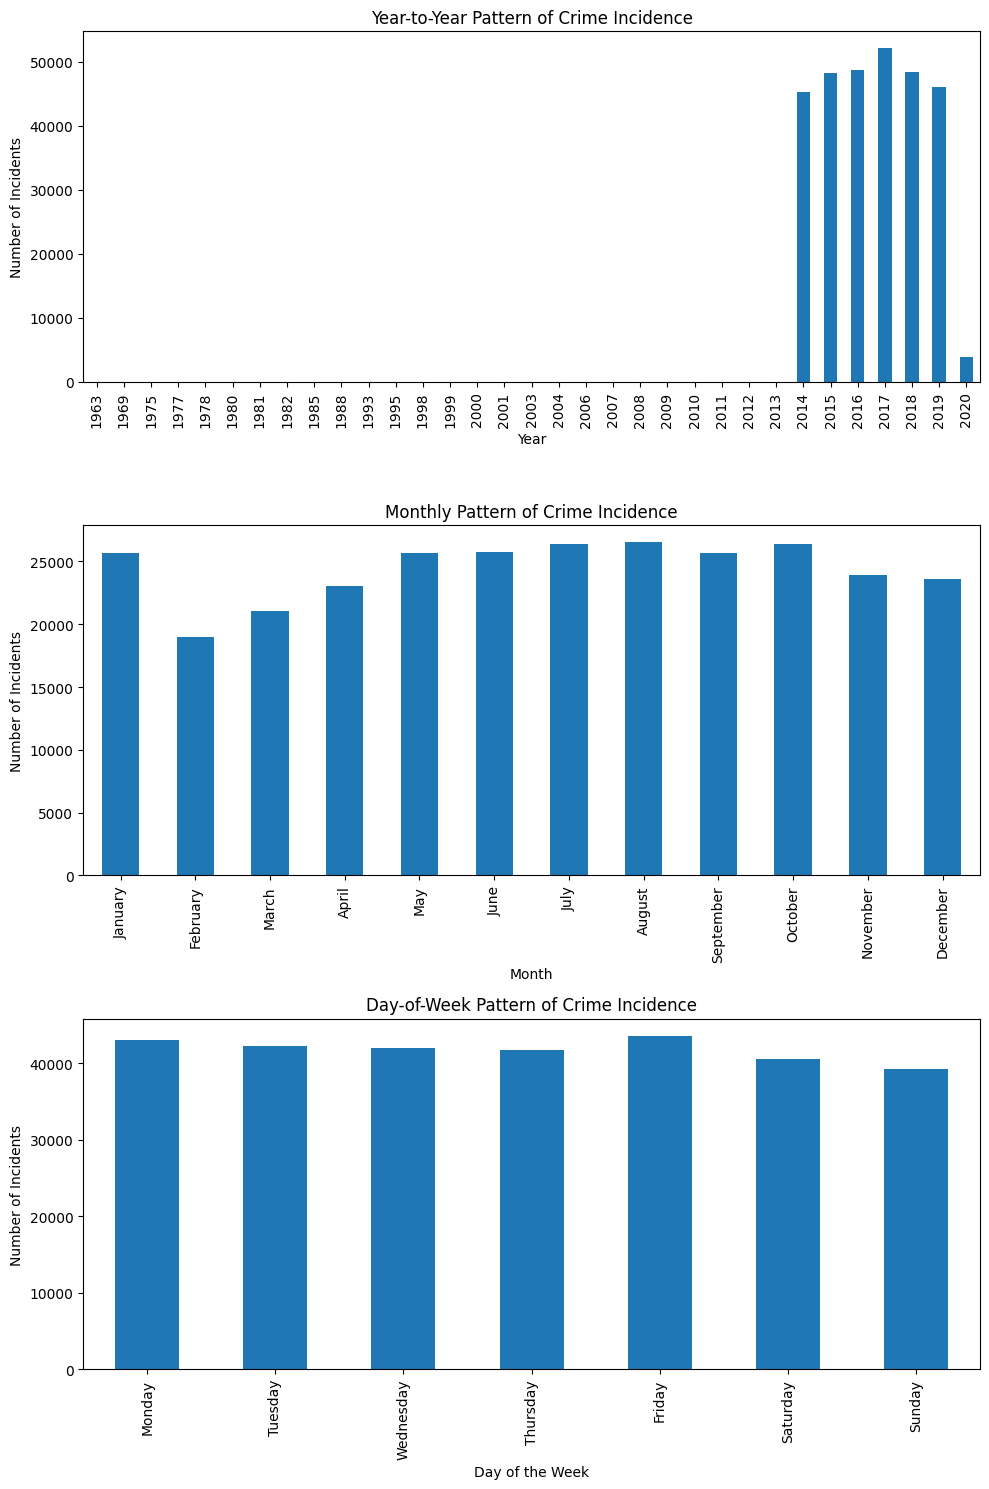

In [14]:

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors='coerce')

df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month_name()
df['Day_of_Week'] = df['CrimeDate'].dt.day_name()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Year-to-Year Pattern
df['Year'].value_counts(sort=False).sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Year-to-Year Pattern of Crime Incidence')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')

# Monthly Pattern
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'].value_counts(sort=False).loc[order].plot(kind='bar', ax=axes[1])
axes[1].set_title('Monthly Pattern of Crime Incidence')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')

# Day-of-Week Pattern
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'].value_counts(sort=False).loc[order].plot(kind='bar', ax=axes[2])
axes[2].set_title('Day-of-Week Pattern of Crime Incidence')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Incidents')

plt.tight_layout()
plt.show()


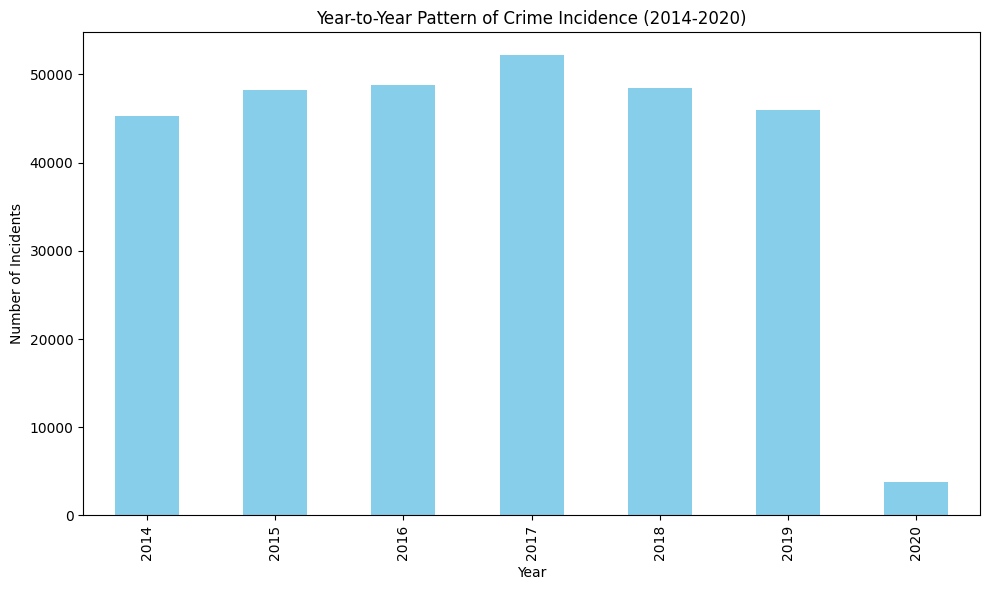

In [20]:
import matplotlib.pyplot as plt

# Filtering out rows where 'CrimeDate' is NaT before extracting the year.
valid_dates_df = df.dropna(subset=['CrimeDate'])
valid_dates_df['Year'] = valid_dates_df['CrimeDate'].dt.year

# Further filtering to keep only years between 2014 and 2020.
valid_years_df = valid_dates_df[(valid_dates_df['Year'] >= 2014) & (valid_dates_df['Year'] <= 2020)]

plt.figure(figsize=(10,6))
# Now plotting only the years from 2014 to 2020 with valid values.
valid_years_df['Year'].value_counts(sort=False).sort_index().plot(kind='bar', color='skyblue')
plt.title('Year-to-Year Pattern of Crime Incidence (2014-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()



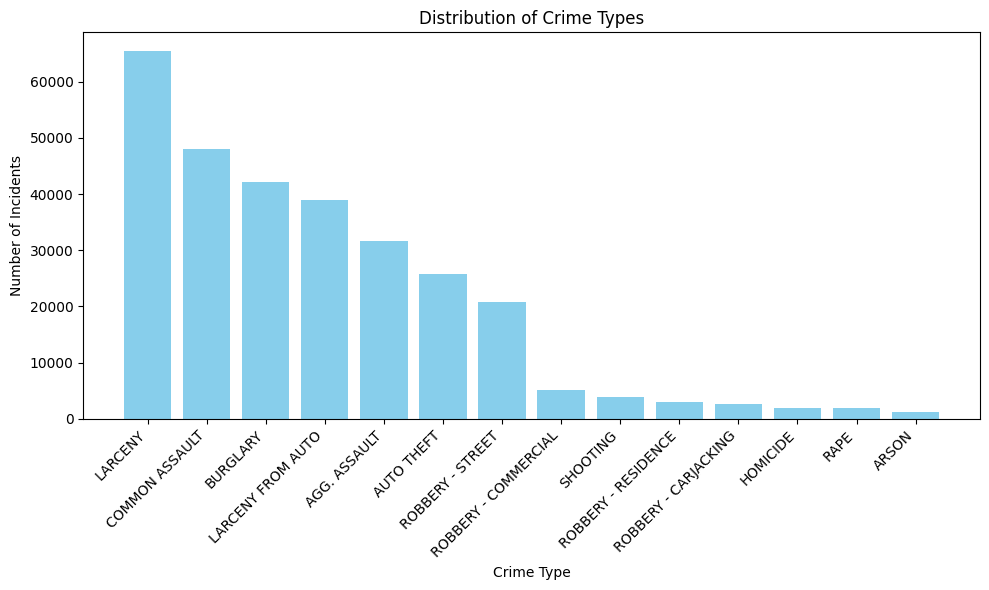

In [15]:
# Creating a bar plot for the distribution of crime types
crime_type_counts = df['Description'].value_counts()
crime_types = crime_type_counts.index

plt.figure(figsize=(10,6))
plt.bar(crime_types, crime_type_counts, color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Crime Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


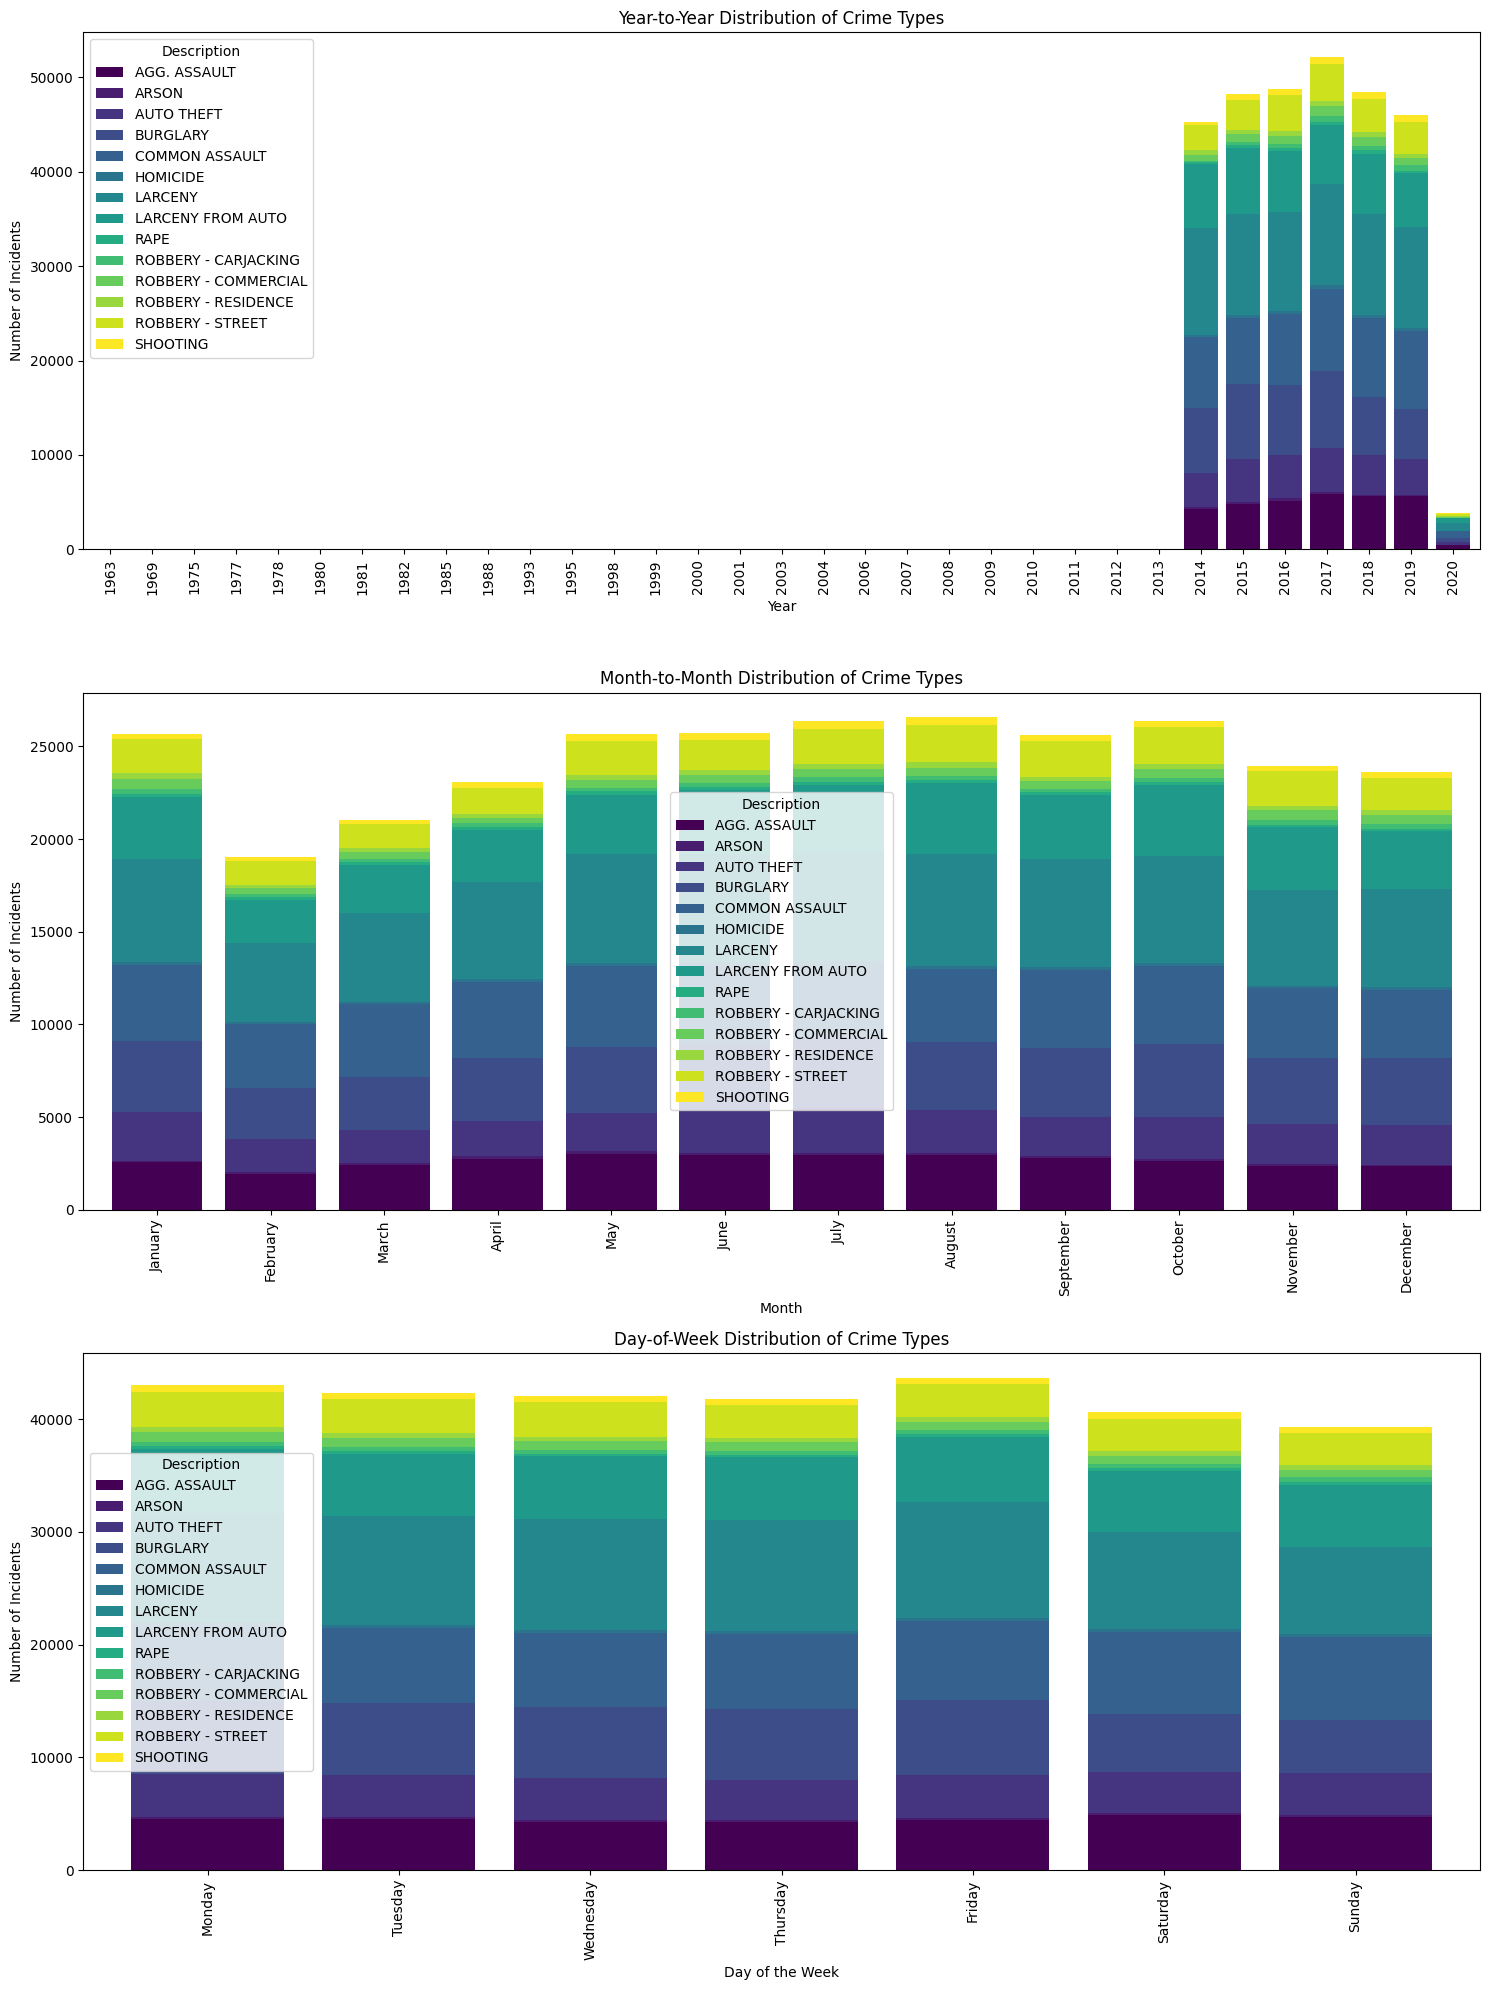

In [16]:
# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Year-to-Year Distribution of Crime Types
yearly_crime = df.groupby(['Year', 'Description']).size().unstack(fill_value=0)
yearly_crime.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis', width=0.8)
axes[0].set_title('Year-to-Year Distribution of Crime Types')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')

# Month-to-Month Distribution of Crime Types
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_crime = df.groupby(['Month', 'Description']).size().unstack(fill_value=0).loc[monthly_order]
monthly_crime.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis', width=0.8)
axes[1].set_title('Month-to-Month Distribution of Crime Types')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')

# Day-of-Week Distribution of Crime Types
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_crime = df.groupby(['Day_of_Week', 'Description']).size().unstack(fill_value=0).loc[dow_order]
dow_crime.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis', width=0.8)
axes[2].set_title('Day-of-Week Distribution of Crime Types')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Incidents')

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show()
